# Welcome to the Solitary Pig Game

In an effort to find the smartest pig in the pen, we're going to run a few simulations.

In an effort to find the smartest pig, we're going to automatically play the game thousands upon thousands of times. What's the game? Glad you asked:

* Pig is given 7 turns
* What's a turn?
    * To start the turn, the pig must roll the dice at least once.
    * If the pig rolls a one, the turn is over.
    * Any number other than 1 is added to a 'turn score'.
    * The pig must then decided to roll again, or to roll the turn score into their overall score.
    * If a pig rolls a 1, the turn score is **not** added to the overall score. The pig loses any accumulation and starts the next turn.
    * The game is over once 7 turns have been completed.

In [1]:
import matplotlib.pyplot as plt
import random
import math
import statistics
%matplotlib inline

In [63]:
class Game:
    
    def __init__(self):
        self.turns_left = 7
        self.overall_score = 0
        self.turn_score = 0
        
    def roll(self):
        """Roll a six sided die."""
        result = random.randint(1, 6)
        if result == 1:
            self.turns_left -= 1
            self.turn_score = 0
        else:
            self.turn_score += result
            
    def hold(self):
        self.overall_score += self.turn_score
        self.turn_score = 0
        self.turns_left -= 1
               

class Player:
    
    def __init__(self):
        self.strategy = 1
        self.score_history = []


class Simulation:
    
    def __init__(self, game, player):
        self.game = game
        self.player = player
        self.reset()
        
    def reset(self):
        self.game.turns_left = 7
        self.game.overall_score = 0
        self.game.turn_score = 0

    def run_simulation(self):
        self.reset()
        turn_strategy = self.player.strategy
        while self.game.turns_left > 0:
            if turn_strategy < 1:
                self.game.hold()
                turn_strategy = self.player.strategy
            self.game.roll()
            turn_strategy -= 1

        self.player.score_history.append(self.game.overall_score)
            
        

In [148]:
glenn = Player()
glenn.strategy = 1
game1 = Game()
sim1 = Simulation(game1, glenn)
for _ in range(100000):
    sim1.run_simulation()

## First simulation - player holds after just 1 roll

Below, you will see that the player, Glenn, was created with a stragegy to roll the dice only 1 time.

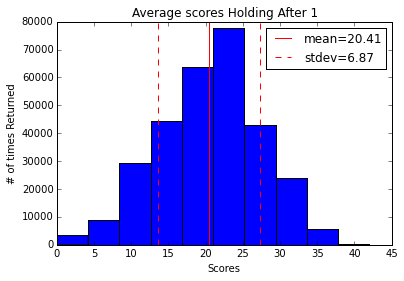

In [165]:
plt.hist(glenn.score_history)
mean = statistics.mean(glenn.score_history)
stdev = statistics.stdev(glenn.score_history)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red', label='mean={}'.format(round(mean, 2)))
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed', label="stdev={}".format(round(stdev, 2)))
plt.xlabel("Scores")
plt.ylabel("# of times Returned")
plt.title("Average scores Holding After 1")
plt.legend()
plt.show()

## Second simulation - player holds after 3 rolls
The player, Sean, was created with a stragegy to roll the dice 3 times. 

In [154]:
sean = Player()
sean.strategy = 3
game2 = Game()
sim2 = Simulation(game2, sean)
for _ in range(100000):
    sim2.run_simulation()

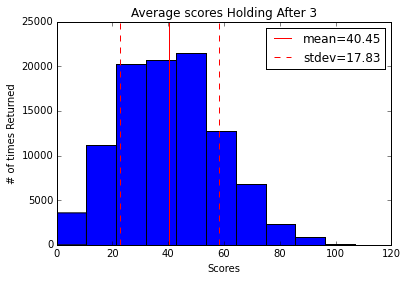

In [155]:
plt.hist(sean.score_history)
mean = statistics.mean(sean.score_history)
stdev = statistics.stdev(sean.score_history)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red', label='mean={}'.format(round(mean, 2)))
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed', label="stdev={}".format(round(stdev, 2)))
plt.xlabel("Scores")
plt.ylabel("# of times Returned")
plt.title("Average scores Holding After 3")
plt.legend()
plt.show()

## Third simulation - player holds after 6 rolls
Rose was created with a stragegy to roll the dice 6 times. The average score after playing 100,000 times was 47.82. While the average is more than holding after 3, the increase was not as large as holding at 1 compared to 3.

In [158]:
rose = Player()
rose.strategy = 6
game3 = Game()
sim3 = Simulation(game3, rose)
for _ in range(100000):
    sim3.run_simulation()

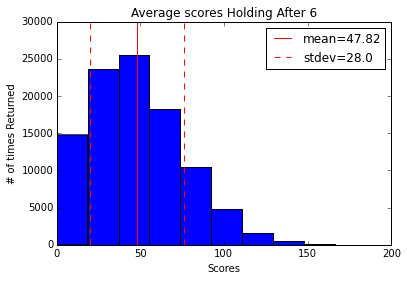

In [166]:
plt.hist(rose.score_history)
mean = statistics.mean(rose.score_history)
stdev = statistics.stdev(rose.score_history)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red', label='mean={}'.format(round(mean, 2)))
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed', label="stdev={}".format(round(stdev, 2)))
plt.xlabel("Scores")
plt.ylabel("# of times Returned")
plt.title("Average scores Holding After 6")
plt.legend()
plt.show()

## Fourth simulation - player holds after 10 rolls
The player, Rachel, was created with a stragegy roll the dice 10 times. The average score after playing 100,000 times was 44.69.

In [161]:
rachel = Player()
rachel.strategy = 10
game4 = Game()
sim4 = Simulation(game4, rachel)
for _ in range(100000):
    sim4.run_simulation()

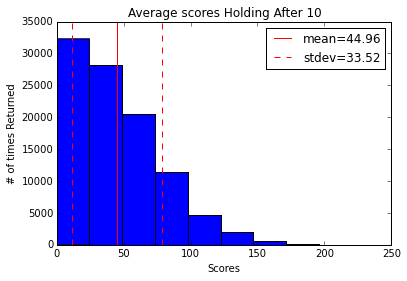

In [167]:
plt.hist(rachel.score_history)
mean = statistics.mean(rachel.score_history)
stdev = statistics.stdev(rachel.score_history)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red', label='mean={}'.format(round(mean, 2)))
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed', label="stdev={}".format(round(stdev, 2)))
plt.xlabel("Scores")
plt.ylabel("# of times Returned")
plt.title("Average scores Holding After 10")
plt.legend()
plt.show()

## Fith simulation - player holds after 5 rolls
Vivian was created with a stragegy to roll the dice 5 times. The average score after playing 100,000 times was 44.49. 

In [163]:
vivian = Player()
vivian.strategy = 10
game5 = Game()
sim5 = Simulation(game5, vivian)
for _ in range(100000):
    sim5.run_simulation()

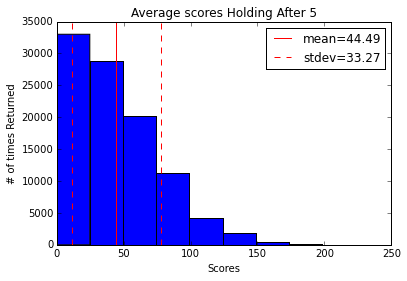

In [168]:
plt.hist(vivian.score_history)
mean = statistics.mean(vivian.score_history)
stdev = statistics.stdev(vivian.score_history)
ymin, ymax = plt.ylim()
plt.vlines(mean, ymin, ymax, color='red', label='mean={}'.format(round(mean, 2)))
plt.vlines([mean - stdev, mean + stdev], ymin, ymax, color='red', linestyles='dashed', label="stdev={}".format(round(stdev, 2)))
plt.xlabel("Scores")
plt.ylabel("# of times Returned")
plt.title("Average scores Holding After 5")
plt.legend()
plt.show()

In [ ]:
## Conclusion
Rose, playing 